## ___Missing Values___

Missing data, or Missing values, occur when __no data__ / __no value__ is stored for a certain observation within a variable. 

Missing data are a common occurrence in data in business settings, and can have a significant effect on the conclusions that can be drawn from the data. Incomplete data is an unavoidable problem in dealing with most data sources.

### ___Why is Data Missing?___

The source of missing data can be very different and here are just a few examples:

- A value is missing because it was forgotten or lost or not stored properly
- For a certain observation, the value of the variable does not exist
- The value can't be known or identified

Example: __SURVEY__

Imagine the data is entered manually into an online form. The data entry could easily forget to complete a field in the form, and therefore, that value for that form would be missing.

The person being asked may not want to disclose the answer to one of the questions, for example, their income. That would be then a missing value for that person.

Sometimes, a certain feature can't be calculated for a specific individual. For example, in the variable 'total debt as percentage of total income' if the person has no income, then the total percentage of 0 does not exist. Therefore it will be a missing value.

### ___Missing Data Mechanisms___

There are 3 mechanisms that lead to missing data, 2 of them involve missing data randomly or almost-randomly, and the third one involves a systematic loss of data.

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [9]:
!pip install kaggle

!mkdir .kaggle

import json
token = {"username":"piyushsingla","key":"94939b9ecb5fcbd1eb64911f57ee6087"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
# run after gap of 30-40 Secs
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [16]:
!kaggle config set -n path -v{/content}

!kaggle competitions download -c titanic -p /content

- path is now set to: {/content}
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 1.33MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 27.6MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 57.4MB/s]


In [49]:
# let's load the titanic dataset

titanic = pd.read_csv('/content/train.csv')
data = titanic.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


_In python, the missing values are stored as NaN, see for example the first row for the variable deck._

#### 1. ___Missing Completely at Random (MCAR)___

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. 
When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

If values for observations are missing completely at random, then disregarding those cases would not bias the inferences made.

In [19]:
# slice the dataframe to show only those observations with missing value for Embarked

data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


These 2 women were travelling together, Miss Icard was the maid of Mrs Stone.

A priori, there does not seem to be an indication that the missing information in the variable Embarked is depending on any other variable, and the fact that these women survived, means that they could have been asked for this information.

Very likely this missingness was generated at the time of building the dataset and therefore we could assume that it is completely random. We can assume that the probability of data being missing for these 2 women is the same as the probability for this variable to be missing for any other person. Of course this will be hard, if possible at all, to prove.

#### 2. ___Missing at Random (MAR)___ 

MAR occurs when there is a systematic relationship between the propensity of missing values and the observed data. In other words, the probability an observation being missing depends only on available information (other variables in the dataset). For example, if men are more likely to disclose their weight than women, weight is MAR. The weight information will be missing at random for those men and women that decided not to disclose their weight, but as men are more prone to disclose it, there will be more missing values for women than for men.

In a situation like the above, if we decide to proceed with the variable with missing values (in this case weight), we might benefit from including gender to control the bias in weight for the missing observations.

For this example, We will use the Lending Club loan book. we will look specifically at the variables employer name (emp_title) and years in employment (emp_length), declared by the borrowers at the time of applying for a loan. The former refers to the name of the company for which the borrower works, the second one to how many years the borrower has worked for named company.

Here we will show an example, in which a data point missing in one variable (emp_title) depends on the value entered on the other variable (emp_length).

In [20]:
!kaggle datasets download -d wendykan/lending-club-loan-data -p /content

!unzip \*.zip

 99% 711M/720M [00:06<00:00, 101MB/s]
100% 720M/720M [00:07<00:00, 107MB/s]
Archive:  lending-club-loan-data.zip
  inflating: LCDataDictionary.xlsx   
  inflating: database.sqlite         
  inflating: loan.csv                


In [21]:
# let's load the columns of interest from the Lending Club loan book dataset

data1=pd.read_csv('/content/loan.csv', usecols=['emp_title','emp_length'])
data1.head()

,emp_title,emp_length
0,Chef,10+ years
1,Postmaster,10+ years
2,Administrative,6 years
3,IT Supervisor,10+ years
4,Mechanic,10+ years


In [22]:
# let's check the amount of missing data
data1.isnull().mean()

emp_title     0.073858
emp_length    0.064984
dtype: float64

Around 6% of the observations contain missing data for employment title.

In [23]:
# let's peek at the different employer names

print('Number of different employer names: {}'.format(len(data1.emp_title.unique())))
data1.emp_title.unique()[0:20]

Number of different employer names: 512695


array(['Chef', 'Postmaster ', 'Administrative', 'IT Supervisor',
       'Mechanic', 'Director COE', 'Account Manager',
       'Assistant Director', 'Legal Assistant III', nan, 'Consultant',
       'Job Coach Supervisor', 'Quality Field Engineer', 'Teller ',
       'respritory therapist', 'Worship Director', 'Processor ',
       'Neonatal Nurse Practitioner', 'Stationary Engineer',
       'Exhibits director'], dtype=object)

In [30]:
# let's inspect the variable emp_length
data1.emp_length.isnull().sum()/len(data1)

0.0649838897175525

In [0]:
data1.emp_length = np.where(data1.emp_length.isnull(),'',data1.emp_length)

In [36]:
# the variable emp_length has many categories. I will summarise it
# into 3 for simplicity:'0-10 years' or '10+ years' or 'n/a'

# let's build a dictionary to re-map emp_length to just 3 categories:

length_dict = {k:'0-10 years' for k in data1.emp_length.unique()}
length_dict['10+ years']='10+ years'
length_dict['']='Empty'

# let's look at the dictionary
length_dict

{'': 'Empty',
 '1 year': '0-10 years',
 '10+ years': '10+ years',
 '2 years': '0-10 years',
 '3 years': '0-10 years',
 '4 years': '0-10 years',
 '5 years': '0-10 years',
 '6 years': '0-10 years',
 '7 years': '0-10 years',
 '8 years': '0-10 years',
 '9 years': '0-10 years',
 '< 1 year': '0-10 years'}

In [38]:
# let's re-map the emp_length

data1['emp_length_redefined'] = data1.emp_length.map(length_dict)
data1.emp_length_redefined.unique()

array(['10+ years', '0-10 years', 'Empty'], dtype=object)

In [39]:
# let's calculate the proportion of working years
# with same employer for those who miss data on employer name

# number of borrowers for whom employer name is missing
value = len(data1[data1.emp_title.isnull()])

# % of borrowers for whom employer name is missing 
# within each category of employment length
data1[data1.emp_title.isnull()].groupby(['emp_length_redefined'])['emp_length'].count().sort_values() / value

emp_length_redefined
10+ years     0.021124
0-10 years    0.103810
Empty         0.875067
Name: emp_length, dtype: float64

The majority of the missing values in the job title (emp_title) supplied by the borrower coincides with the label n/a of employment length. This supports the idea that the 2 variables are related.

In [40]:
# let's do the same for those bororwers who reported
# the employer name

# number of borrowers for whom employer name is present
value = len(data1.dropna(subset=['emp_title']))

# % of borrowers within each category
data1.dropna(subset=['emp_title']).groupby(['emp_length_redefined'])['emp_length'].count().sort_values() / value

emp_length_redefined
Empty         0.000381
10+ years     0.355580
0-10 years    0.644039
Name: emp_length, dtype: float64

The number of borrowers who have reported an employer name and indicate n/a as employment length are minimal. Further supporting the idea that the missing values in employment length and employment length are related.

'n/a' in 'employment length' could be supplied by people who are retired, or students, or self-employed. In all of those cases there would not be a number of years at employment to provide, therefore the customer would enter 'n/a' and leave empty the form at the side of 'employer_name'.

In a scenario like this, a missing value in the variable emp_title depends on or is related to the 'n/a' label in the variable emp_length. And, this missing value nature is, in principle, independent of the variable we want to predict (in this case whether the borrower will repay their loan). How this will affect the predictions is unknown.

#### 3. ___Missing Not at Random (MNAR)___

Missing of values is not at random (MNAR) if their being missing depends on information not recorded in the dataset. In other words, there is a mechanism or a reason why missing values are introduced in the dataset.

Examples:

MNAR would occur if people failed to fill in a depression survey because of their level of depression. Here, the missing of data is related to the outcome, depression.

In [41]:
# you can determine the total number of missing values using
# the isnull method plus the sum method on the dataframe

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
# alternatively, you can call the mean method after isnull
# to visualise the percentage of the dataset that 
# contains missing values for each variable

data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

We can see that there are missing data in the variables Age, Deck (on which the passenger was travelling) and Embarked, which is the port from which the passenger got into the Titanic.

In this dataset, both the missing values of the variables Deck and Age, were introduced systematically. For many of the people who did not survive, the **age** they had or the **deck** they were staying in, could not be established. The people who survived could be asked for that information.

Can we infer this by looking at the data?

In a situation like this, we could expect a greater number of missing values for people who did not survive.

In [44]:
# we create a dummy variable that indicates whether the value
# of the variable deck is missing

data['Cabin'] = np.where(data.Cabin.isnull(), 1, 0)

# find percentage of null values
data.Cabin.mean()

0.7710437710437711

As expected, this value coincides with the one observed above when we called the .isnull().mean() method on the dataset.

In [45]:
# and then we evaluate the mean of the missing values in
# cabin for the people who survived vs the non-survivors.

# group data by Survived vs Non-Survived
# and find nulls for cabin
data.groupby(['Survived'])['Cabin'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin, dtype: float64

We observe that the percentage of missing values is higher for people who did not survive (0.87), respect to people that survived (0.60).
This finding is aligned with our hypothesis that the data is missing because after the people died, the information could not be retrieved.

Having said this, to truly underpin whether the data is missing not at random, we would need to get extremely familiar with the way data was collected. Analysing datasets, can only point us in the right direction or help us build assumptions.

In [46]:
# we repeat the exercise for the variable age:
# First we create a dummy variable that indicates
# whether the value of the variable Age is missing

data['Age_null'] = np.where(data.Age.isnull(), 1, 0)

# and then look at the mean in the different survival groups:
# there are more NaN for the people who did not survive
data.groupby(['Survived'])['Age_null'].mean()

Survived
0    0.227687
1    0.152047
Name: Age_null, dtype: float64

Again, we observe an increase in missing data for the people who did not survive the tragedy. The analysis therefore suggests: 

**There is a systematic loss of data: people who did not survive tend to have more information missing. Presumably, the method chosen to gather the information, contributes to the generation of these missing data.**

## ___Handling Missing Values___

It is very important to handle missing values in the dataset while developing a solution. There are various ways to do so:

1. ___REMOVING VALUES___

This method commonly used to handle the null values. Here, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. One has to make sure that after we have deleted the data, there is no addition of bias. Removing the data will lead to loss of information which will not give the expected results while predicting the output.

2. ___IMPUTATION___

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a complete dataset that can be used to train machine learning models.

3. ___BUILDING A PREDICTION MODEL___

Using the features which do not have missing values, we can predict the nulls with the help of a machine learning algorithm. This method may result in better accuracy, unless a missing value is expected to have a very high variance. 

There are multiple techniques for missing data:
1. Complete Case Analysis
2. Mean / Median / Mode Imputation
3. Random Sample Imputation
4. Replacement by Arbitrary Value
5. End of Distribution Imputation
6. Missing Value Indicator

#### ___Complete Case Analysis___

Complete case analysis implies analysing only those observations in the dataset that contain values in all the variables. In other words, in complete case analysis we remove all observations with missing values. This procedure is suitable when there are few observations with missing data in the dataset. But, if the dataset contains missing data across multiple variables, or some variables contain a high proportion of missing observations, we can easily remove a big chunk of the dataset, and this is undesired. 

In [0]:
data = titanic.copy()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
print('Total passengers with values in all variables: ', data.dropna().shape[0])
print('Total passengers in the Titanic: ', data.shape[0])
print('Percentage of data without missing values: ', data.dropna().shape[0]/ np.float(data.shape[0]))

Total passengers with values in all variables:  183
Total passengers in the Titanic:  891
Percentage of data without missing values:  0.2053872053872054


So, we have complete information for only 20% of our observations in the Titanic dataset. Thus, CCA would not be an option for this dataset.

#### ___Mean / Median / Mode Imputation___

We can replace missing values with the mean, the median or the mode of the variable. Mean (if the variable has a Gaussian distribution)/ median (if the variable has a Skewed distribution)/ mode imputation is widely adopted in organisations and data competitions. Although in practice this technique is used in almost every situation, the procedure is suitable if data is missing at random and in small proportions. If there are a lot of missing observations, however, we will distort the distribution of the variable, as well as its relationship with other variables in the dataset. Distortion in the variable distribution may affect the performance of linear models.

For categorical variables, replacement by the mode, is also known as replacement by the most frequent category.

In [53]:
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [123]:
data.Age.isnull().sum()

177

In [124]:
data.Cabin.isnull().sum()

687

In [125]:
data.Embarked.isnull().sum()

2

Imputation should be done over the training set, and then propagated to the test set. This means that the mean/median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In the titanic dataset, we can see that Age contains 19.8653%, Cabin contains 77.10% and Embarked contains 0.22% of missing values.

Text(0.5, 0, 'Age')

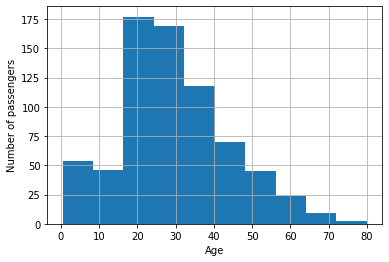

In [56]:
# plot the distribution of age to find out if they are Gaussian or skewed.

plt.figure(figsize=(6,4))
fig = data.Age.hist(bins=10)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

We can see that the age distribution is skewed. So, we will use the median imputation.

In [91]:
# separate dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [61]:
median = X_train.Age.median()
median

29.0

In [62]:
# impute missing values in age in train and test set

for df in [X_train, X_test]:
    df['Age'].fillna(median, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
# Stats Mode Calculation 

from scipy import stats 
stats.mode(data['Cabin'])

ModeResult(mode=array(['C23 C25 C27'], dtype=object), count=array([4]))

In [126]:
# imputer Method from SKLEARN

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values= np.nan, strategy='most_frequent') #mean/median
X = pd.DataFrame(imp.fit_transform(data,'Embarked'),columns = data.columns)
X.Embarked.isnull().sum()

0

#### ___Random Sample Imputation___

Random sample imputation refers to randomly selecting values from the variable to replace the missing data. This technique preserves the variable distribution, and is well suited for data missing at random. But, we need to account for randomness by adequately setting a seed. Otherwise, the same missing observation could be replaced by different values in different code runs, and therefore lead to a different model predictions. This is not desired when using our models within an organisation.

Random sample imputation has the assumption that the data are missing completely at random (MCAR). If this is the case, it makes sense to substitute the missing values, by values extracted from the original variable distribution/ category frequency.

In [0]:
data3 = titanic.copy()

In [130]:
from sklearn.model_selection import train_test_split

# separate dataset into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data3, data3.Survived, test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

#### ___Replacement by Arbitrary Value___

Replacement by an arbitrary value, as its names indicates, refers to replacing missing data by any, arbitrarily determined value, but the same value for all missing data. Replacement by an arbitrary value is suitable if data is not missing at random, or if there is a huge proportion of missing values. If all values are positive, a typical replacement is -1. Alternatively, replacing by 999 or -999 are common practice. We need to anticipate that these arbitrary values are not a common occurrence in the variable. Replacement by arbitrary values however may not be suited for linear models, as it most likely will distort the distribution of the variables, and therefore model assumptions may not be met.


For categorical variables, this is the equivalent of replacing missing observations with the label “Missing” which is a widely adopted procedure.

In [0]:
# write a function to create 3 variables from Age:

def impute_na(df, variable, median):
    
    # Median Value
    df[variable+'_median'] = df[variable].fillna(median)
    
    # Arbitrary Value
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred']= df[variable].fillna(100)

    # End Tail Replacement
    df[variable+'_endtail']= df[variable].fillna(df.Age.mean()+3*df.Age.std())

    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na - no.of samples same as Count of Nulls
    random_sample = X_train[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    # fill with random-sample
    df[variable+'_random_sample'] = df[variable].fillna(random_sample)

    return df

In [175]:
# importing pandas as pd 
import pandas as pd 
  
# Creating the dataframe  
df = pd.DataFrame({"A":[12, 4, 5, None, 1], 
                   "B":[None, 2, 54, 3, None], 
                   "C":[20, 16, None, 3, 8], 
                   "D":[14, 3, None, None, 6]}) 
  
# to interpolate the missing values 
df.interpolate(method ='linear', limit_direction ='backward', limit = 1) # limit allows only 1 NA to be filled

,A,B,C,D
0,12.0,2.0,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,9.5,NaN
3,3.0,3.0,3.0,5.0
4,1.0,NaN,8.0,6.0


#### ___End of Distribution Imputation___

End of tail imputation involves replacing missing values by a value at the far end of the tail of the variable distribution. This technique is similar in essence to imputing by an arbitrary value. However, by placing the value at the end of the distribution, we need not look at each variable distribution individually, as the algorithm does it automatically for us. This imputation technique tends to work well with tree-based algorithms, but it may affect the performance of linear models, as it distorts the variable distribution.

In [139]:
import warnings
warnings.filterwarnings('ignore')

impute_na(X_train, 'Age', median)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_zero,Age_hundred,Age_endtail,Age_random,Age_random_sample
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.0,51.0,51.0,51.00000,51.0,51.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.0,49.0,49.0,49.00000,49.0,49.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.0,1.0,1.0,1.00000,1.0,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.0,54.0,54.0,54.00000,54.0,54.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.0,0.0,100.0,73.43632,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.0,39.0,39.0,39.00000,39.0,39.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.0,19.0,19.0,19.00000,19.0,19.0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.0,0.0,100.0,73.43632,14.5,14.5
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.0,36.0,36.0,36.00000,36.0,36.0


#### ___Missing Indicator___

The missing indicator technique involves adding a binary variable to indicate whether the value is missing for a certain observation. This variable takes the value 1 if the observation is missing, or 0 otherwise. One thing to notice is that we still need to replace the missing values in the original variable, which we tend to do with mean or median imputation. By using these 2 techniques together, if the missing value has predictive power, it will be captured by the missing indicator, and if it doesn’t it will be masked by the mean / median imputation. These 2 techniques in combination tend to work well with linear models. But, adding a missing indicator expands the feature space and, as multiple variables tend to have missing values for the same observations, many of these newly created binary variables could be identical or highly correlated.

In [140]:
data6 = titanic.copy()

X_train, X_test, y_train, y_test = train_test_split(data6, data6.Survived, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [141]:
# create variable indicating missingness

X_train['Age_NA'] = np.where(X_train['Age'].isnull(), 1, 0)
X_test['Age_NA'] = np.where(X_test['Age'].isnull(), 1, 0)

X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,1


In [142]:
# we can see that mean and median are similar. So I will replace with the median

X_train.Age.mean(), X_train.Age.median()

(29.915338645418327, 29.0)

In [143]:
# let's replace the NA with the median value in the training set
X_train['Age'].fillna(X_train.Age.median(), inplace=True)
X_test['Age'].fillna(X_train.Age.median(), inplace=True)

X_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,29.0,1,0,2689,14.4583,NaN,C,1
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,0


#### ___Predictive Modelling___

Using the features which do not have missing values, we can predict the nulls with the help of a machine learning algorithm. This method may result in better accuracy, unless a missing value is expected to have a very high variance. We will be using linear regression to replace the nulls in the feature ‘age’, using other available features. One can experiment with different algorithms and check which gives the best accuracy instead of sticking to a single algorithm.

In [0]:
## LINEAR REGRESSION

data = titanic.copy()

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

data_with_null = data[['PassengerId','Pclass','Survived','SibSp','Parch','Fare','Age']].dropna()
data_without_null = data_with_null.dropna()

train_data_x = data_without_null.iloc[:,:6]
train_data_y = data_without_null.iloc[:,6]

lr.fit(train_data_x,train_data_y)
test_data = data_with_null.iloc[:,:6]

data_with_null.Age.fillna(pd.DataFrame(lr.predict(test_data))[0],inplace = True)

In [162]:
data_with_null.head()

,PassengerId,Pclass,Survived,SibSp,Parch,Fare,Age
0,1,3,0,1,0,7.2500,22.0
1,2,1,1,1,0,71.2833,38.0
2,3,3,1,0,0,7.9250,26.0
3,4,1,1,1,0,53.1000,35.0
4,5,3,0,0,0,8.0500,35.0


In [174]:
## KNN IMPUTER or We Can also use KNNRegressor, KNNClassifier

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 2)
X = pd.DataFrame(imputer.fit_transform(data_with_null),columns = data_with_null.columns)

X

## KNN Classifier for Imputation: https://chrisalbon.com/machine_learning/preprocessing_structured_data/imputing_missing_class_labels_using_k-nearest_neighbors/

,PassengerId,Pclass,Survived,SibSp,Parch,Fare,Age
0,1.0,3.0,0.0,1.0,0.0,7.2500,22.0
1,2.0,1.0,1.0,1.0,0.0,71.2833,38.0
2,3.0,3.0,1.0,0.0,0.0,7.9250,26.0
3,4.0,1.0,1.0,1.0,0.0,53.1000,35.0
4,5.0,3.0,0.0,0.0,0.0,8.0500,35.0
...,...,...,...,...,...,...,...
709,886.0,3.0,0.0,0.0,5.0,29.1250,39.0
710,887.0,2.0,0.0,0.0,0.0,13.0000,27.0
711,888.0,1.0,1.0,0.0,0.0,30.0000,19.0
712,890.0,1.0,1.0,0.0,0.0,30.0000,26.0


___sklearn.impute.IterativeImputer___ class is very flexible - it can be used with a variety of estimators to do round-robin regression, treating every variable as an output in turn.

* **BayesianRidge**: regularized linear regression
* **DecisionTreeRegressor**: non-linear regression
* **ExtraTreesRegressor**: similar to missForest in R
* **KNeighborsRegressor**: comparable to other KNN imputation approaches

and then uses Mean Squared Error to find best fitted value.